___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

In [ ]:
ANN : Artificial Neurol Network

Biological Neuron
Perceptron Model
Mathematical Representation

Input Layer-->2 hidden Layer--> Output Layer

Input Layer: Real values from the data
hidden Layer: Layers in between input and output
              3 or mor layers is deep network 

Output Layer : Final estimate the output
    
As you go forwards through mor layers, the levels of abstraction increases.

Sigmoid function

Hyperbolic Tangent:tanh(z)
    
Rectified Linear Unit(ReLU): This is a ctually a relatively simple function:max(0,z)
        

# Keras Basics

In [2]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [3]:
m = 2
b = 3
x = np.linspace(0,50,100)

In [4]:
# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0, scale=4.0, size=len(x))

In [6]:
x

array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13.13131313, 13.63636364, 14.14141414, 14.64646465,
       15.15151515, 15.65656566, 16.16161616, 16.66666667, 17.17171717,
       17.67676768, 18.18181818, 18.68686869, 19.19191919, 19.6969697 ,
       20.2020202 , 20.70707071, 21.21212121, 21.71717172, 22.22222222,
       22.72727273, 23.23232323, 23.73737374, 24.24242424, 24.74747475,
       25.25252525, 25.75757576, 26.26262626, 26.76767677, 27.27272727,
       27.77777778, 28.28282828, 28.78787879, 29.29292929, 29.7979798 ,
       30.3030303 , 30.80808081, 31.31313131, 31.81818182, 32.32323232,
       32.82828283, 33.33333333, 33.83838384, 34.34343434, 34.84

In [7]:
noise

array([ 1.08273994e+01,  2.51253084e+00,  3.63187779e+00,  2.01530302e+00,
        2.60447179e+00, -1.27727218e+00, -3.39230793e+00,  2.42386140e+00,
       -8.07267298e+00,  2.96048823e+00,  2.11525398e+00, -2.35600213e+00,
        7.54781238e-01, -3.03548822e+00, -3.73294887e+00,  3.82022604e+00,
        7.63177289e-01,  7.91502930e+00,  1.04238691e+01,  2.73403554e+00,
        1.21066179e+00,  6.77489170e+00, -6.82434372e+00, -4.63647766e+00,
       -5.39362882e-01,  1.56211137e+00,  6.67618544e-01,  7.38007437e-01,
        3.23082366e+00,  2.91838701e-01,  2.55514805e+00,  1.31858520e+00,
       -1.98841609e+00, -3.01627880e+00, -3.77362561e+00,  1.93900659e+00,
       -4.67093266e-01,  7.60701918e+00,  9.52507835e-01,  7.98660914e+00,
       -3.97305400e+00,  7.87198020e-01, -4.54657837e+00,  1.46591842e-03,
        4.10393661e+00, -6.26391617e-01, -1.26316576e-01,  2.59930333e+00,
        8.61938577e+00, -2.44103542e+00, -3.02130136e+00, -1.38567401e+00,
        5.88107085e-01, -

In [8]:
y = 2*x + b + noise

In [9]:
y

array([ 13.82739936,   6.52263185,   8.65207981,   8.04560605,
         9.64487583,   6.77323287,   5.66829813,  12.49456847,
         3.0081351 ,  15.05139732,  15.21626408,  11.75510898,
        15.87599336,  13.09582491,  13.40846528,  21.97174119,
        19.92479345,  28.08674647,  31.6056873 ,  24.92595473,
        24.412682  ,  30.98701291,  18.3978785 ,  21.59584557,
        26.70306136,  29.81463662,  29.93024481,  31.01073471,
        34.51365194,  32.58476799,  35.85817836,  35.63171651,
        33.33481623,  33.31705453,  33.56980873,  40.29254194,
        38.8965431 ,  47.98075655,  42.33634622,  50.38054854,
        39.4309864 ,  45.20133943,  40.87766405,  46.43580935,
        51.54838105,  47.82815384,  49.33832989,  53.07405081,
        60.10423426,  50.05391407,  50.48374915,  53.1294775 ,
        56.11335961,  54.61756138,  59.78053217,  62.65479667,
        55.86215953,  68.02721413,  57.05058994,  65.03787123,
        65.15018185,  72.95223574,  64.12018793,  67.55

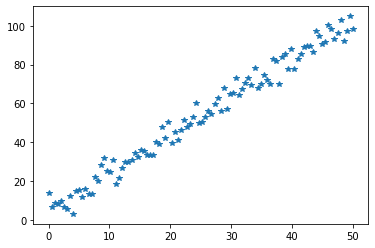

In [10]:
plt.plot(x, y, '*')

## Creating a Neural Network for a Line of Best Fit

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [14]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 8697.6709
Epoch 2/500
4/4 [==============================] - 0s 1000us/step - loss: 8371.9873
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 8059.2773
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 7748.8140
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 7461.6670
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 7171.6445
Epoch 7/500
4/4 [==============================] - 0s 1000us/step - loss: 6911.6895
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 6644.6021
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 6390.6855
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 6152.3730
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 5905.3877
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 5663.0063
Epoch 13/500
4/4 [=

In [16]:
model.history.history # all the loss point

# model.history.history["loss"]

{'loss': [8697.6708984375,
  8371.9873046875,
  8059.27734375,
  7748.81396484375,
  7461.6669921875,
  7171.64453125,
  6911.689453125,
  6644.60205078125,
  6390.685546875,
  6152.373046875,
  5905.3876953125,
  5663.00634765625,
  5465.373046875,
  5334.1337890625,
  5196.43359375,
  5070.6875,
  4941.5498046875,
  4819.7587890625,
  4698.708984375,
  4577.7705078125,
  4468.3779296875,
  4355.01171875,
  4246.560546875,
  4141.9287109375,
  4038.301513671875,
  3936.2890625,
  3839.56884765625,
  3744.77880859375,
  3650.2685546875,
  3554.6767578125,
  3470.899658203125,
  3379.79541015625,
  3297.951171875,
  3212.1201171875,
  3129.84716796875,
  3049.661865234375,
  2969.331298828125,
  2887.296630859375,
  2808.195556640625,
  2737.162841796875,
  2669.054931640625,
  2595.566650390625,
  2526.208984375,
  2461.11474609375,
  2397.64990234375,
  2331.383544921875,
  2271.378173828125,
  2208.7392578125,
  2151.10107421875,
  2091.696044921875,
  2033.7388916015625,
  1978.4750

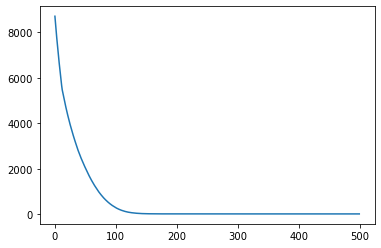

In [17]:
loss = model.history.history["loss"]
epochs = range(len(loss))

plt.plot(epochs, loss)

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [18]:
x_for_predictions = np.linspace(0,50,1000)

In [19]:
y_predicted = model.predict(x_for_predictions)

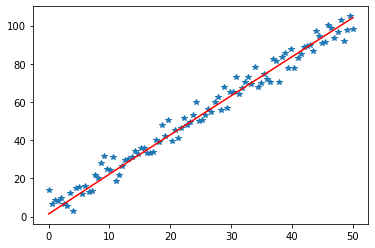

In [20]:
# Original X and Y
plt.plot(x, y, '*')
# Our Model's prediction Line
plt.plot(x_for_predictions, y_predicted, 'r')

# Evaluating Our Error

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [23]:
mean_squared_error(y, prediction_for_true_y)

19.035714187893568

In [24]:
mean_absolute_error(y, prediction_for_true_y)

3.5365462938511176

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context, refer back to our model evaluation lecture for full details!